# Importing Libraries

In [297]:
import time
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import KFold, train_test_split, RepeatedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
import category_encoders as ce

from sklearn import metrics
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# reading csv files

In [179]:
col = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class_value']
df =  pd.read_table('car.data', delimiter= ',', header=None, names=col)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Attribute Values:

#### buying:       v-high, high, med, low
#### maint:        v-high, high, med, low
#### doors:        2, 3, 4, 5-more
#### persons:      2, 4, more
#### lug_boot:     small, med, big
#### safety:       low, med, high

# Statistic Summary of df

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1728 non-null   object
 1   maint        1728 non-null   object
 2   doors        1728 non-null   object
 3   persons      1728 non-null   object
 4   lug_boot     1728 non-null   object
 5   safety       1728 non-null   object
 6   class_value  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [181]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class_value
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,2,2,small,high,unacc
freq,432,432,432,576,576,576,1210


## Frequency distribution of values in variables

In [182]:
for col in col:
    print(df[col].value_counts())   

high     432
vhigh    432
low      432
med      432
Name: buying, dtype: int64
high     432
vhigh    432
low      432
med      432
Name: maint, dtype: int64
2        432
5more    432
3        432
4        432
Name: doors, dtype: int64
2       576
more    576
4       576
Name: persons, dtype: int64
small    576
big      576
med      576
Name: lug_boot, dtype: int64
high    576
low     576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class_value, dtype: int64


# Split feature and target variables

In [301]:
X = df.drop(['buying', 'persons'], axis=1)
y = df['buying']

# Split data into training and test set

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [303]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 5), (571, 5))

# Feature Engineering

## Categorical Variables Encoding

In [304]:
# encode categorical variables with LabelEncoder

encoder = ce.OrdinalEncoder(cols=['maint', 'doors', 'lug_boot', 'safety', 'class_value'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

C:\Users\BOK\anaconda3\envs\test_env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [305]:
X_train.head()

,maint,doors,lug_boot,safety,class_value
48,1,1,1,1,1
468,1,1,2,1,1
155,2,1,2,2,1
1721,3,2,2,2,2
1208,3,3,2,2,1


In [306]:
X_test.head()

,maint,doors,lug_boot,safety,class_value
599,2,4,1,2,1
1201,3,3,1,3,3
628,2,2,3,3,1
1498,2,2,1,3,3
1263,3,4,1,1,1


# Model Building

In [307]:
# decision tree classifier
dtc = DecisionTreeClassifier(random_state = 0)

dtc.fit(X_train, y_train)

dtc_pred = dtc.predict(X_test)

print('Model accuracy score with decision-trees : {0:0.4f}'. format(accuracy_score(y_test, dtc_pred)))

# extra tree classifier

etc = ExtraTreesClassifier(random_state = 0)

etc.fit(X_train, y_train)

etc_pred = etc.predict(X_test)

print('Model accuracy score with extra-trees : {0:0.4f}'. format(accuracy_score(y_test, etc_pred)))

# random forest classifier

rfc = RandomForestClassifier(random_state = 0)

rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print('Model accuracy score with random forest : {0:0.4f}'. format(accuracy_score(y_test, rfc_pred)))

# gradient boosting classifier

gbc = GradientBoostingClassifier(random_state = 0)

gbc.fit(X_train, y_train)

gbc_pred = gbc.predict(X_test)

print('Model accuracy score with gradient boosting trees : {0:0.4f}'. format(accuracy_score(y_test, gbc_pred)))

# logistic regression

lr = LogisticRegression(solver='saga', multi_class='auto', random_state=0, n_jobs=-1)

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print('Model accuracy score with logistic regression : {0:0.4f}'. format(accuracy_score(y_test, lr_pred)))

Model accuracy score with decision-trees : 0.1401
Model accuracy score with extra-trees : 0.1401
Model accuracy score with random forest : 0.1506
Model accuracy score with gradient boosting trees : 0.2592
Model accuracy score with logistic regression : 0.2715


#### From the comparison, logistic regression algorithm perform the best among all.

# Feature Importance

In [308]:
# view the feature scores

feature_scores = pd.Series(gbc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

class_value    0.479536
maint          0.326853
safety         0.101088
lug_boot       0.052514
doors          0.040009
dtype: float64

We can see that the most important feature is safety and least important feature is doors.

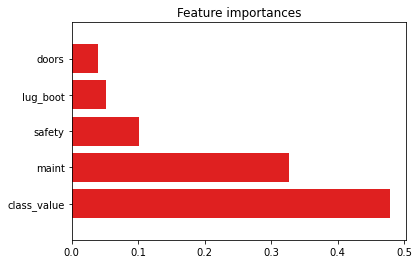

In [309]:
plt.title("Feature importances")
sns.barplot(x = feature_scores, y = feature_scores.index,
       color="r")
plt.yticks(range(len(feature_scores)), feature_scores.index)
plt.ylim([-1, len(feature_scores)])
plt.show()

# Prediction with Neural Networks

In [310]:
X = df.drop(['buying', 'persons'], axis=1)
y = df['buying']

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [312]:
# encode categorical variables with LabelEncoder

encoder = ce.OrdinalEncoder(cols=['maint', 'doors', 'lug_boot', 'safety', 'class_value'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

C:\Users\BOK\anaconda3\envs\test_env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [313]:
# encode categorical variables with LabelEncoder

encoder = ce.OrdinalEncoder()

y_train = encoder.fit_transform(y_train)

y_test = encoder.transform(y_test)

In [314]:
y_train = y_train - 1
y_test = y_test - 1

In [315]:
y_train = keras.utils.to_categorical(y_train, num_classes = 4)
y_test = keras.utils.to_categorical(y_test, num_classes = 4)

In [316]:
X_train = X_train.reset_index(drop = True)
X_train

,maint,doors,lug_boot,safety,class_value
0,1,1,1,1,1
1,1,1,2,1,1
2,2,1,2,2,1
3,3,2,2,2,2
4,3,3,2,2,1
...,...,...,...,...,...
1152,4,1,1,2,4
1153,3,2,3,3,2
1154,3,2,1,2,3
1155,2,4,2,3,1


In [319]:
def MLP_model(Nhidd):
# define the MLP network using TF Keras with required no. of layers, proper output layer for multi-class classification, appropriate activation and loss functions
  tf.random.set_seed(0)
  model = Sequential()
  model.add(Dense(Nhidd , activation = 'relu', input_shape = (5,)))
  model.add(Dense(Nhidd, activation = 'relu'))
  model.add(Dense(Nhidd, activation = 'relu'))
  model.add(Dense(4, activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

  return model

In [320]:
acc_train_array = []
acc_valid_array = []
# Consider Nhidd from 1 to 10
for Nhidd in range(1,11):
    acc_train_array_fold = []
    acc_valid_array_fold = []
    ## Random permutation of data
    Idx = np.random.RandomState(seed=8).permutation(len(y_train))
    ## Create the MLP model called clf with Nhidd hidden nodes
    clf = MLP_model(Nhidd)
    ## Tuning: perform 5-fold cross-validation on the training set to determine the best network size
    for k in range(0,5):
        N = np.around((k+1)*len(y_train)/5)
        N = N.astype(int)
        Xvalid = X_train.iloc[Idx[N-24:N]] # validation features
        Yvalid = y_train[Idx[N-24:N]] # validation targets
        Idxtrn = np.setdiff1d(Idx, Idx[N-24:N])
        Xtrain = X_train.iloc[Idxtrn] # training features in tuning loop 
        Ytrain = y_train[Idxtrn] # training targets in tuning loop
        # MLP classification with same size for each hidden-layer (specified in question)
        clf.fit(Xtrain, Ytrain, epochs = 100, verbose = 0)
        # get predictions from model using training data
        y_est_p = clf.predict(Xtrain)
        Ytrain_class = np.argmax(Ytrain, axis=1)
        y_est_p_class = np.argmax(y_est_p, axis=1)
        acc_train_array_fold += [metrics.accuracy_score(y_est_p_class,Ytrain_class)]
        ## get predictions from model using validation data
        yt_est_p = clf.predict(Xvalid)
        Yvalid_class = np.argmax(Yvalid, axis=1)
        yt_est_p_class = np.argmax(yt_est_p, axis=1) 
        acc_valid_array_fold += [metrics.accuracy_score(yt_est_p_class,Yvalid_class)]
        # This is the end of the 5-fold cross-validation loop
    acc_train_array += [np.mean(acc_train_array_fold)] 
    acc_valid_array += [np.mean(acc_valid_array_fold)]
    print(clf.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 1)                 6         
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_75 (Dense)             (None, 4)                 8         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 2)                 12        
_____________________________

## Plotting

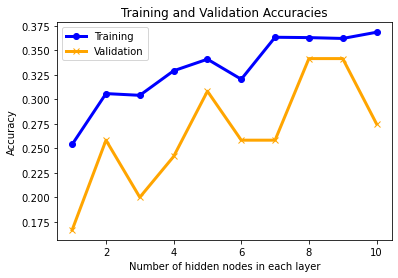

best hidden layer size = 8 based on 5-fold cross-validation on training set


In [321]:
hiddensize = [x for x in range(1,11)]
plt.plot(hiddensize, acc_train_array, color='blue', marker='o', linewidth=3, label='Training')
plt.plot(hiddensize, acc_valid_array, color='orange', marker='x', linewidth=3, label='Validation')
plt.xlabel('Number of hidden nodes in each layer')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()
## find the best hidden layer size that gives the best validation accuracy using only the training set
Nhidden = np.argmax(acc_valid_array,axis=0)+1
print('best hidden layer size =', Nhidden, 'based on 5-fold cross-validation on training set')

## Prediction

In [322]:
## Perform evaluation on test set
# create MLP model with best hidden layer size
clf = MLP_model(Nhidden)
clf.summary()
# train it with all the training data
# history = [WriteCode] ...
history = clf.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 0)
## Generate the MLP model output
y_test_predict = clf.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_test_predict_class = np.argmax(y_test_predict, axis=1)
test_accuracy = metrics.accuracy_score(y_test_predict_class,y_test_class)
print('test accuracy =', test_accuracy)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 8)                 48        
_________________________________________________________________
dense_113 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_114 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_115 (Dense)            (None, 4)                 36        
Total params: 228
Trainable params: 228
Non-trainable params: 0
_________________________________________________________________
test accuracy = 0.28371278458844135


# Confusion matric

In [146]:
cm = confusion_matrix(y_test, gbc_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[37 16 35 53]
 [32 33 56 25]
 [39 34 27 39]
 [61 12 21 51]]


# Classification report

In [147]:
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

        high       0.22      0.26      0.24       141
         low       0.35      0.23      0.27       146
         med       0.19      0.19      0.19       139
       vhigh       0.30      0.35      0.33       145

    accuracy                           0.26       571
   macro avg       0.27      0.26      0.26       571
weighted avg       0.27      0.26      0.26       571



# Predicting using GBC without doors features (Train with full dataset)

In [169]:
X_pred = pd.DataFrame({'maint': 'High', 'doors': '4', 'lug_boot': 'Big', 'safety': 'High', 'class_value': 'Good'}, index=[0])

# declare feature vector and target variable

X = df.drop(['buying', 'persons'], axis=1)

y = df['buying']

In [170]:
encoder = ce.OrdinalEncoder(cols=['maint', 'doors', 'lug_boot', 'safety', 'class_value'])

X_train = encoder.fit_transform(X)

X_test = encoder.transform(X_pred)

C:\Users\BOK\anaconda3\envs\test_env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [171]:
X_train

,maint,doors,lug_boot,safety,class_value
0,1,1,1,1,1
1,1,1,1,2,1
2,1,1,1,3,1
3,1,1,2,1,1
4,1,1,2,2,1
...,...,...,...,...,...
1723,4,4,2,2,4
1724,4,4,2,3,3
1725,4,4,3,1,1
1726,4,4,3,2,4


In [174]:
# gradient boosting classifier

# Maintenance = High, Number of doors = 4, Lug Boot Size = Big, Safety = High, Class Value = Good

gbc = GradientBoostingClassifier(random_state = 0)

gbc.fit(X_train, y)

gbc_pred = gbc.predict(X_test)

In [176]:
gbc_pred

array(['med'], dtype=object)